## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.626596 -1.563691 -1.535154 -0.328823 -0.534814 -0.815194
1  1.718976  1.282461 -1.336778  0.839338  0.935311  1.087184
2 -0.095316  0.888899 -0.311258 -0.038060  1.108491  0.742412
3 -1.603799  0.135895 -0.688299  0.209977 -0.021598 -0.970683
4  0.717151  0.347389  1.448899  0.773367 -1.124416  1.503336


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0006525	total: 57.6ms	remaining: 57.6s
1:	learn: 0.9903552	total: 58.1ms	remaining: 29s
2:	learn: 0.9781486	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9683066	total: 59.2ms	remaining: 14.7s
4:	learn: 0.9592661	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9479950	total: 60.4ms	remaining: 10s
6:	learn: 0.9357245	total: 61ms	remaining: 8.65s
7:	learn: 0.9268286	total: 61.5ms	remaining: 7.62s
8:	learn: 0.9174944	total: 61.9ms	remaining: 6.81s
9:	learn: 0.9087229	total: 62.4ms	remaining: 6.17s
10:	learn: 0.8992611	total: 62.9ms	remaining: 5.65s
11:	learn: 0.8905554	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8820808	total: 63.8ms	remaining: 4.84s
13:	learn: 0.8740795	total: 64.3ms	remaining: 4.53s
14:	learn: 0.8670293	total: 64.7ms	remaining: 4.25s
15:	learn: 0.8575753	total: 65.2ms	remaining: 4.01s
16:	learn: 0.8498431	total: 65.6ms	remaining: 3.79s
17:	learn: 0.8420348	total: 66.2ms	remaining: 3.61s
18:	learn: 0.8332041	total: 66.6ms	remaining: 3.44

109:	learn: 0.3760637	total: 108ms	remaining: 873ms
110:	learn: 0.3728685	total: 108ms	remaining: 869ms
111:	learn: 0.3699252	total: 109ms	remaining: 864ms
112:	learn: 0.3673424	total: 109ms	remaining: 858ms
113:	learn: 0.3646709	total: 110ms	remaining: 852ms
114:	learn: 0.3625569	total: 110ms	remaining: 847ms
115:	learn: 0.3596913	total: 111ms	remaining: 843ms
116:	learn: 0.3574219	total: 111ms	remaining: 838ms
117:	learn: 0.3550680	total: 112ms	remaining: 834ms
118:	learn: 0.3528310	total: 112ms	remaining: 829ms
119:	learn: 0.3500353	total: 112ms	remaining: 824ms
120:	learn: 0.3479330	total: 113ms	remaining: 820ms
121:	learn: 0.3448824	total: 113ms	remaining: 816ms
122:	learn: 0.3424768	total: 114ms	remaining: 811ms
123:	learn: 0.3397813	total: 114ms	remaining: 808ms
124:	learn: 0.3370457	total: 115ms	remaining: 805ms
125:	learn: 0.3348700	total: 115ms	remaining: 801ms
126:	learn: 0.3326404	total: 116ms	remaining: 798ms
127:	learn: 0.3302906	total: 117ms	remaining: 794ms
128:	learn: 

272:	learn: 0.1294011	total: 187ms	remaining: 497ms
273:	learn: 0.1286993	total: 187ms	remaining: 496ms
274:	learn: 0.1278358	total: 187ms	remaining: 494ms
275:	learn: 0.1269644	total: 188ms	remaining: 493ms
276:	learn: 0.1263113	total: 188ms	remaining: 491ms
277:	learn: 0.1255129	total: 189ms	remaining: 490ms
278:	learn: 0.1248830	total: 189ms	remaining: 489ms
279:	learn: 0.1242088	total: 190ms	remaining: 488ms
280:	learn: 0.1235975	total: 190ms	remaining: 486ms
281:	learn: 0.1228148	total: 190ms	remaining: 485ms
282:	learn: 0.1219263	total: 191ms	remaining: 483ms
283:	learn: 0.1211177	total: 191ms	remaining: 482ms
284:	learn: 0.1205487	total: 192ms	remaining: 481ms
285:	learn: 0.1197816	total: 192ms	remaining: 480ms
286:	learn: 0.1190368	total: 193ms	remaining: 479ms
287:	learn: 0.1182900	total: 193ms	remaining: 478ms
288:	learn: 0.1177827	total: 193ms	remaining: 476ms
289:	learn: 0.1172718	total: 194ms	remaining: 475ms
290:	learn: 0.1168225	total: 195ms	remaining: 474ms
291:	learn: 

487:	learn: 0.0460716	total: 292ms	remaining: 306ms
488:	learn: 0.0458579	total: 293ms	remaining: 306ms
489:	learn: 0.0457782	total: 293ms	remaining: 305ms
490:	learn: 0.0455193	total: 294ms	remaining: 304ms
491:	learn: 0.0453134	total: 294ms	remaining: 304ms
492:	learn: 0.0450611	total: 295ms	remaining: 303ms
493:	learn: 0.0449801	total: 295ms	remaining: 302ms
494:	learn: 0.0447661	total: 296ms	remaining: 302ms
495:	learn: 0.0445655	total: 296ms	remaining: 301ms
496:	learn: 0.0443557	total: 297ms	remaining: 300ms
497:	learn: 0.0442104	total: 297ms	remaining: 299ms
498:	learn: 0.0440157	total: 297ms	remaining: 299ms
499:	learn: 0.0437744	total: 298ms	remaining: 298ms
500:	learn: 0.0435702	total: 298ms	remaining: 297ms
501:	learn: 0.0434281	total: 299ms	remaining: 296ms
502:	learn: 0.0432886	total: 299ms	remaining: 296ms
503:	learn: 0.0431295	total: 300ms	remaining: 295ms
504:	learn: 0.0429310	total: 300ms	remaining: 294ms
505:	learn: 0.0427948	total: 301ms	remaining: 294ms
506:	learn: 

649:	learn: 0.0235898	total: 371ms	remaining: 200ms
650:	learn: 0.0235569	total: 371ms	remaining: 199ms
651:	learn: 0.0234602	total: 372ms	remaining: 198ms
652:	learn: 0.0233647	total: 372ms	remaining: 198ms
653:	learn: 0.0233107	total: 373ms	remaining: 197ms
654:	learn: 0.0231855	total: 373ms	remaining: 197ms
655:	learn: 0.0231534	total: 374ms	remaining: 196ms
656:	learn: 0.0230598	total: 374ms	remaining: 195ms
657:	learn: 0.0229319	total: 375ms	remaining: 195ms
658:	learn: 0.0228317	total: 375ms	remaining: 194ms
659:	learn: 0.0228003	total: 376ms	remaining: 193ms
660:	learn: 0.0227692	total: 376ms	remaining: 193ms
661:	learn: 0.0226449	total: 377ms	remaining: 192ms
662:	learn: 0.0225448	total: 377ms	remaining: 192ms
663:	learn: 0.0225144	total: 378ms	remaining: 191ms
664:	learn: 0.0223932	total: 378ms	remaining: 190ms
665:	learn: 0.0222949	total: 379ms	remaining: 190ms
666:	learn: 0.0222066	total: 379ms	remaining: 189ms
667:	learn: 0.0220884	total: 380ms	remaining: 189ms
668:	learn: 

869:	learn: 0.0114966	total: 475ms	remaining: 71ms
870:	learn: 0.0114551	total: 476ms	remaining: 70.4ms
871:	learn: 0.0114169	total: 476ms	remaining: 69.9ms
872:	learn: 0.0113776	total: 477ms	remaining: 69.3ms
873:	learn: 0.0113404	total: 477ms	remaining: 68.8ms
874:	learn: 0.0113173	total: 477ms	remaining: 68.2ms
875:	learn: 0.0112806	total: 478ms	remaining: 67.6ms
876:	learn: 0.0112580	total: 478ms	remaining: 67.1ms
877:	learn: 0.0112358	total: 479ms	remaining: 66.5ms
878:	learn: 0.0111922	total: 479ms	remaining: 65.9ms
879:	learn: 0.0111494	total: 479ms	remaining: 65.4ms
880:	learn: 0.0111123	total: 480ms	remaining: 64.8ms
881:	learn: 0.0110777	total: 480ms	remaining: 64.3ms
882:	learn: 0.0110399	total: 481ms	remaining: 63.7ms
883:	learn: 0.0110047	total: 481ms	remaining: 63.2ms
884:	learn: 0.0109834	total: 482ms	remaining: 62.6ms
885:	learn: 0.0109625	total: 483ms	remaining: 62.1ms
886:	learn: 0.0109038	total: 483ms	remaining: 61.5ms
887:	learn: 0.0108689	total: 483ms	remaining: 61

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

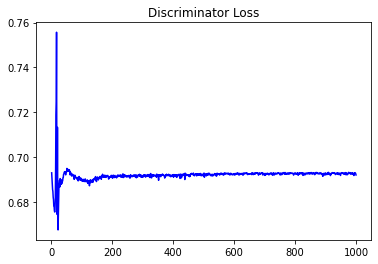

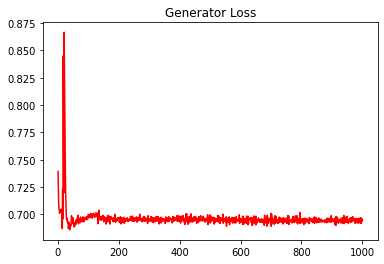

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.04710351239542396


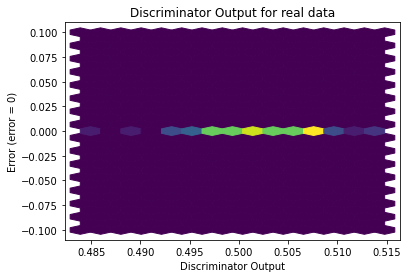

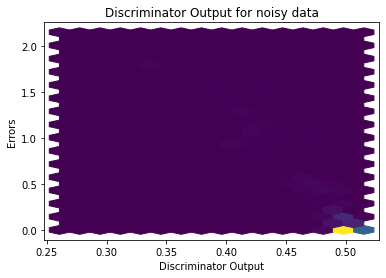

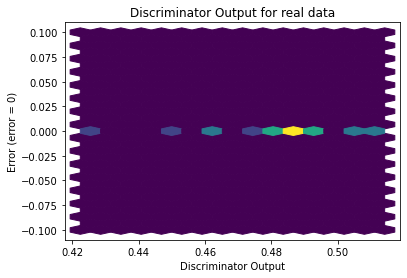

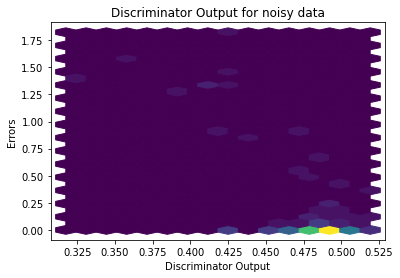

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


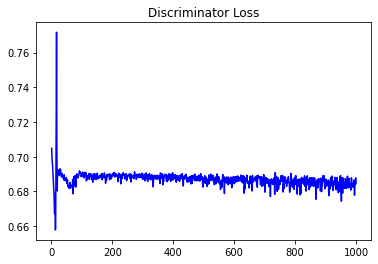

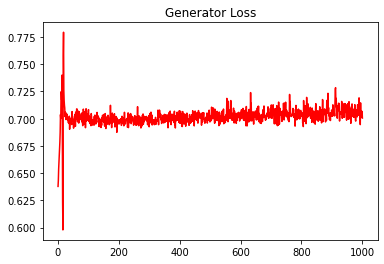

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.025081527759207068


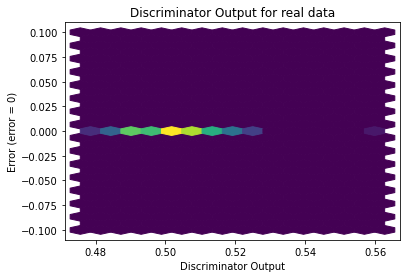

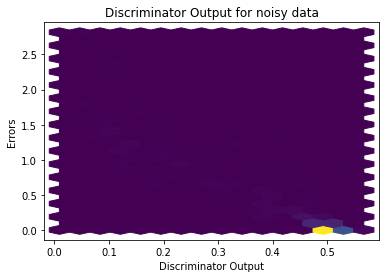

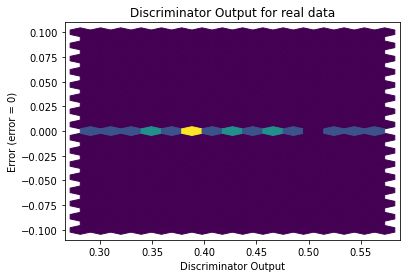

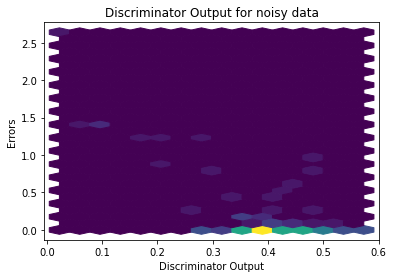

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1251]], requires_grad=True)
